In [19]:
import pandas as pd
import numpy as np
from IPython.display import display, HTML
import sqlite3
from sqlite3 import Error
import matplotlib.pyplot as plt

#change your file path
homeless = pd.read_csv('homeless_impact.csv')
print(homeless.head())
print(homeless['county'].nunique())
print(homeless['county'].value_counts())

#change your file path
hospital = pd.read_csv('hospitals_by_county.csv')
print(hospital.head())

      county       date  rooms  rooms_occupied  trailers_requested  \
0    Alameda  4/14/2020  403.0           115.0                91.0   
1     Alpine  4/14/2020    NaN             NaN                 NaN   
2     Amador  4/14/2020    NaN             NaN                 NaN   
3      Butte  4/14/2020   65.0            65.0                 NaN   
4  Calaveras  4/14/2020    NaN             NaN                 NaN   

   trailers_delivered  donated_trailers_delivered  
0                85.0                         NaN  
1                 NaN                         NaN  
2                 NaN                         NaN  
3                 NaN                         NaN  
4                 NaN                         NaN  
173
San Francisco      154
Plumas County      143
Humboldt County    143
Marin County       143
Mariposa County    143
                  ... 
Monterey             1
San Diego            1
Mariposa             1
Santa Cruz           1
Stanislaus           1
Name: coun

In [20]:
db_list = []
key = 0
for row_name, item in homeless.iterrows():
    temp = []
    temp.append(str(key))
    for x in item:
        temp.append(x)
    db_list.append(temp)
    key = key+1
#print(db_list)


In [24]:
def create_connection(db_file, delete_db=False):
    import os
    conn = None
    try:
        conn = sqlite3.connect(db_file)
        conn.execute("PRAGMA foreign_keys = 1")
    except Error as e:
        print(e)

    return conn


def create_table(conn, create_table_sql, drop_table_name=None):
    
    if drop_table_name: # You can optionally pass drop_table_name to drop the table. 
        try:
            c = conn.cursor()
            c.execute("""DROP TABLE IF EXISTS %s""" % (drop_table_name))
        except Error as e:
            print(e)
    
    try:
        c = conn.cursor()
        c.execute(create_table_sql)
    except Error as e:
        print(e)
        
        
def execute_sql_statement(sql_statement, conn):
    cur = conn.cursor()
    cur.execute(sql_statement)

    rows = cur.fetchall()

    
    return rows

In [25]:
def insert_homeless(conn, values):
    sql = """ INSERT INTO HOMELESS VALUES(?,?,?,?,?,?,?,?)"""
    cur = conn.cursor()
    #print(values)
    cur.execute(sql, values)
    return cur.lastrowid

create_homeless_table_sql = """CREATE TABLE [HOMELESS] (
    [PK] TEXT NOT NULL PRIMARY KEY,
    [COUNTY] TEXT NOT NULL,
    [DATE] TEXT NOT NULL,
    [ROOMS] FLOAT,
    [ROOM_OCCUPIED] FLOAT,
    [TRAILERS_REQUESTED] FLOAT,
    [TRAILERS_DELIVERED] FLOAT,
    [DONATED_TRAILERS_DELIVERED] FLOAT
    );"""

db_file = 'myfile'
conn = create_connection(db_file)
with conn:
    create_table(conn, create_homeless_table_sql, 'Homeless')
    for ele in db_list:
        insert_homeless(conn, ele)
sql_statement = "select * FROM HOMELESS"
df = pd.read_sql_query(sql_statement, conn)
display(df)

,PK,COUNTY,DATE,ROOMS,ROOM_OCCUPIED,TRAILERS_REQUESTED,TRAILERS_DELIVERED,DONATED_TRAILERS_DELIVERED
0,0,Alameda,4/14/2020,403.0,115.0,91.0,85.0,NaN
1,1,Alpine,4/14/2020,NaN,NaN,NaN,NaN,NaN
2,2,Amador,4/14/2020,NaN,NaN,NaN,NaN,NaN
3,3,Butte,4/14/2020,65.0,65.0,NaN,NaN,NaN
4,4,Calaveras,4/14/2020,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
9208,9208,Ventura County,10/30/2020,341.0,144.0,NaN,NaN,NaN
9209,9209,Yolo County,10/30/2020,157.0,152.0,NaN,NaN,NaN
9210,9210,Yuba County,10/30/2020,NaN,NaN,NaN,NaN,NaN
9211,9211,Wilton Rancheria Tribe,10/30/2020,NaN,NaN,NaN,NaN,NaN


In [27]:
create_hospital_table_sql = """CREATE TABLE [HOSPITAL] (
    [PK] TEXT NOT NULL PRIMARY KEY,
    [COUNTY] TEXT NOT NULL,
    [DATE] TEXT NOT NULL,
    [HOSPITALIZED_COVID_CONFIRMED_PATIENTS] INTEGER,
    [HOSPITALIZED_SUSPECTED_COVID_PATIENTS] INTEGER,
    [HOSPITALIZED_COVID_PATIENTS] INTEGER,
    [ALL_HOSPITAL_BEDS] INTEGER,
    [ICU_COVID_CONFIRMED_PATIENTS] INTEGER,
    [ICU_SUSPECTED_COVID_PATIENTS] INTEGER,
    [ICU_AVAILABLE_BEDS] INTEGER
    );"""   


def insert_hospital(conn, values):
    sql = """ INSERT INTO HOSPITAL VALUES(?,?,?,?,?,?,?,?,?,?)"""
    cur = conn.cursor()
    #print(values)
    cur.execute(sql, values)
    return cur.lastrowid

db_list2 = []
key = 0
for row_name, item in hospital.iterrows():
    temp = []
    temp.append(str(key))
    for x in item:
        temp.append(x)
    db_list2.append(temp)
    key += 1
   
    
conn = create_connection(db_file, True)
with conn:
    create_table(conn, create_hospital_table_sql, 'Hospital')
    for ele in db_list2:
        insert_hospital(conn, ele)

In [28]:
sql_statement = "select * FROM Hospital"
df = pd.read_sql_query(sql_statement, conn)
display(df)

,PK,COUNTY,DATE,HOSPITALIZED_COVID_CONFIRMED_PATIENTS,HOSPITALIZED_SUSPECTED_COVID_PATIENTS,HOSPITALIZED_COVID_PATIENTS,ALL_HOSPITAL_BEDS,ICU_COVID_CONFIRMED_PATIENTS,ICU_SUSPECTED_COVID_PATIENTS,ICU_AVAILABLE_BEDS
0,0,Tehama,3/29/2020,0.0,0.0,NaN,NaN,0.0,0.0,2.0
1,1,Santa Clara,3/29/2020,141.0,72.0,NaN,NaN,65.0,15.0,70.0
2,2,San Francisco,3/29/2020,50.0,73.0,NaN,NaN,24.0,10.0,61.0
3,3,Inyo,3/29/2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,El Dorado,3/29/2020,0.0,6.0,NaN,NaN,0.0,3.0,3.0
...,...,...,...,...,...,...,...,...,...,...
12200,12200,Monterey,11/1/2020,25.0,2.0,27.0,717.0,9.0,0.0,28.0
12201,12201,Lake,11/1/2020,3.0,1.0,4.0,65.0,2.0,0.0,2.0
12202,12202,Tulare,11/1/2020,37.0,10.0,47.0,681.0,3.0,0.0,24.0
12203,12203,San Luis Obispo,11/1/2020,7.0,1.0,8.0,460.0,3.0,0.0,30.0


In [7]:
sql_statement = "select Homeless.DATE, sum(HOSPITALIZED_COVID_CONFIRMED_PATIENTS +  ROOM_OCCUPIED) as Total_Covid_Patients from Hospital left join Homeless on Hospital.COUNTY=Homeless.COUNTY group by Homeless.DATE order by Total_Covid_Patients"
df = pd.read_sql_query(sql_statement, conn)
display(df)

,DATE,Total_Covid_Patients
0,4/23/2020,193188.0
1,4/25/2020,204384.0
2,4/26/2020,204602.0
3,4/27/2020,205910.0
4,4/28/2020,207436.0
...,...,...
149,4/19/2020,1624514.0
150,4/20/2020,1631031.0
151,4/21/2020,1635241.0
152,4/22/2020,1712237.0


In [8]:
sql_statement = "select Hospital.COUNTY, sum(HOSPITALIZED_COVID_CONFIRMED_PATIENTS + ICU_COVID_CONFIRMED_PATIENTS + ROOM_OCCUPIED) as Total_Covid_Patients from Hospital left join Homeless on Hospital.COUNTY=Homeless.COUNTY group by Hospital.COUNTY order by Total_Covid_Patients desc LIMIT 32"
df = pd.read_sql_query(sql_statement, conn)
display(df)

,COUNTY,Total_Covid_Patients
0,San Francisco,54909444.0
1,Los Angeles,5670240.0
2,San Diego,1706910.0
3,Riverside,1375340.0
4,Alameda,927818.0
5,Fresno,873010.0
6,Orange,808806.0
7,Santa Clara,784510.0
8,Ventura,742388.0
9,San Bernardino,692048.0


In [9]:
sql_statement = "select Hospital.DATE, sum(HOSPITALIZED_SUSPECTED_COVID_PATIENTS + ICU_SUSPECTED_COVID_PATIENTS + TRAILERS_REQUESTED) as Estimated_Growing_Rate from Hospital left join Homeless on Hospital.COUNTY=Homeless.COUNTY group by Hospital.DATE order by Estimated_Growing_Rate desc"
df = pd.read_sql_query(sql_statement, conn)
display(df)

,DATE,Estimated_Growing_Rate
0,3/30/2020,74523.0
1,3/31/2020,74287.0
2,4/7/2020,73681.0
3,4/8/2020,72105.0
4,4/1/2020,70473.0
...,...,...
213,10/29/2020,33950.0
214,10/26/2020,33945.0
215,10/25/2020,33927.0
216,11/1/2020,33793.0


In [10]:
sql_statement = "select Hospital.COUNTY, Hospital.DATE, sum(HOSPITALIZED_COVID_CONFIRMED_PATIENTS + ICU_COVID_CONFIRMED_PATIENTS + ROOM_OCCUPIED) as Total_Covid_Patients, sum(HOSPITALIZED_SUSPECTED_COVID_PATIENTS + ICU_SUSPECTED_COVID_PATIENTS + TRAILERS_REQUESTED) as Estimated_Growing_Rate from Hospital left join Homeless on Hospital.COUNTY=Homeless.COUNTY group by Hospital.DATE order by Total_Covid_Patients desc"
df = pd.read_sql_query(sql_statement, conn)
display(df)

,COUNTY,DATE,Total_Covid_Patients,Estimated_Growing_Rate
0,Ventura,7/28/2020,362879.0,43374.0
1,San Benito,7/21/2020,362635.0,45839.0
2,Tehama,7/29/2020,362535.0,42342.0
3,Merced,7/20/2020,361590.0,43373.0
4,Shasta,7/27/2020,360724.0,42825.0
...,...,...,...,...
213,Santa Cruz,10/14/2020,300592.0,35948.0
214,Yuba,10/24/2020,300332.0,34585.0
215,Santa Cruz,10/15/2020,300188.0,35682.0
216,Madera,10/16/2020,300157.0,34641.0


In [51]:
sql_statement = "select Hospital.COUNTY as County, sum(HOSPITALIZED_COVID_CONFIRMED_PATIENTS + ICU_COVID_CONFIRMED_PATIENTS + ROOM_OCCUPIED) as Total_Covid_Patients, sum(HOSPITALIZED_SUSPECTED_COVID_PATIENTS + ICU_SUSPECTED_COVID_PATIENTS + TRAILERS_REQUESTED) as Estimated_Growing_Rate from Hospital left join Homeless on Hospital.COUNTY=Homeless.COUNTY group by Hospital.County order by Total_Covid_Patients desc limit 25"
df = pd.read_sql_query(sql_statement, conn)
display(df)

,County,Total_Covid_Patients,Estimated_Growing_Rate
0,San Francisco,54909444.0,3650085.0
1,Los Angeles,5670240.0,2792710.0
2,San Diego,1706910.0,296436.0
3,Riverside,1375340.0,290660.0
4,Alameda,927818.0,335710.0
5,Fresno,873010.0,149230.0
6,Orange,808806.0,383400.0
7,Santa Clara,784510.0,300480.0
8,Ventura,742388.0,NaN
9,San Bernardino,692048.0,259020.0


<AxesSubplot:title={'center':'Total Covid Patients per County'}, xlabel='County'>

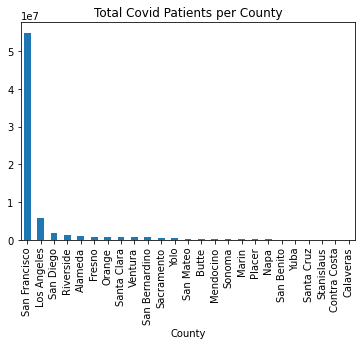

In [52]:
df.set_index('County', inplace=True)
df.plot.bar(y='Total_Covid_Patients', legend=False, title = 'Total Covid Patients per County')

In [84]:
sql_statement = "select Hospital.COUNTY as County, sum(HOSPITALIZED_COVID_CONFIRMED_PATIENTS + ICU_COVID_CONFIRMED_PATIENTS + ROOM_OCCUPIED) as Total_Covid_Patients, sum(HOSPITALIZED_SUSPECTED_COVID_PATIENTS + ICU_SUSPECTED_COVID_PATIENTS + TRAILERS_REQUESTED) as Estimated_Growing_Rate from Hospital left join Homeless on Hospital.COUNTY=Homeless.COUNTY group by Hospital.County order by Estimated_Growing_Rate desc limit 25"
df = pd.read_sql_query(sql_statement, conn)
display(df)
x = df['County']
y = df['Estimated_Growing_Rate']

,County,Total_Covid_Patients,Estimated_Growing_Rate
0,San Francisco,54909444.0,3650085.0
1,Los Angeles,5670240.0,2792710.0
2,Orange,808806.0,383400.0
3,Alameda,927818.0,335710.0
4,Santa Clara,784510.0,300480.0
5,San Diego,1706910.0,296436.0
6,Riverside,1375340.0,290660.0
7,San Bernardino,692048.0,259020.0
8,Monterey,NaN,242940.0
9,Sacramento,464676.0,235210.0


<AxesSubplot:xlabel='County'>

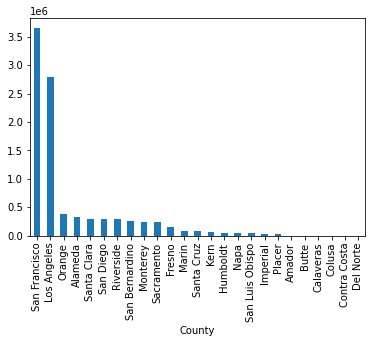

In [71]:
df.set_index('County', inplace=True)
df.plot.bar(y = 'Estimated_Growing_Rate', legend = False)

array([[<AxesSubplot:xlabel='Total_Covid_Patients', ylabel='Total_Covid_Patients'>,
        <AxesSubplot:xlabel='Estimated_Growing_Rate', ylabel='Total_Covid_Patients'>],
       [<AxesSubplot:xlabel='Total_Covid_Patients', ylabel='Estimated_Growing_Rate'>,
        <AxesSubplot:xlabel='Estimated_Growing_Rate', ylabel='Estimated_Growing_Rate'>]],
      dtype=object)

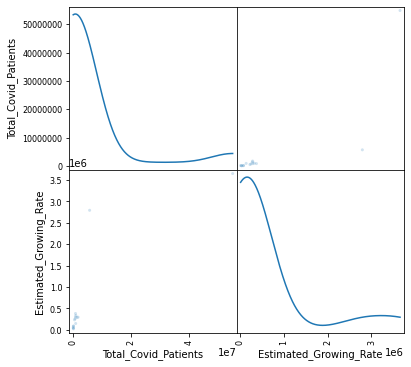

In [73]:
from pandas.plotting import scatter_matrix
scatter_matrix(df, alpha=0.2, figsize=(6, 6), diagonal='kde')

Text(0.5, 1.0, 'Estimated Growth Rate per County')

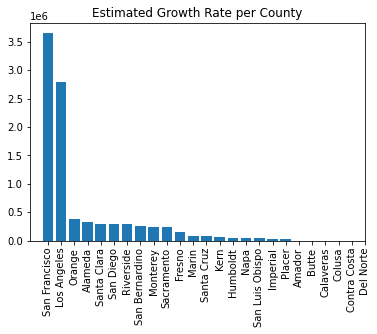

In [74]:
plt.bar(x, y)
plt.xticks(x, rotation='vertical')
plt.title('Estimated Growth Rate per County')

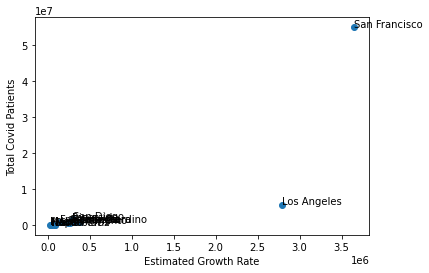

In [97]:
plt.scatter(df['Estimated_Growing_Rate'],df['Total_Covid_Patients'])
plt.xlabel('Estimated Growth Rate')
plt.ylabel('Total Covid Patients')
for i, txt in enumerate(list(df['County'])):
    plt.annotate(txt, (df['Estimated_Growing_Rate'][i], df['Total_Covid_Patients'][i]))

In [99]:
sql_statement = "select Hospital.COUNTY as County, sum(HOSPITALIZED_COVID_CONFIRMED_PATIENTS + ICU_COVID_CONFIRMED_PATIENTS + ROOM_OCCUPIED) as Total_Covid_Patients, sum(HOSPITALIZED_SUSPECTED_COVID_PATIENTS + ICU_SUSPECTED_COVID_PATIENTS + TRAILERS_REQUESTED) as Estimated_Growing_Rate from Hospital left join Homeless on Hospital.COUNTY=Homeless.COUNTY group by Hospital.County order by Estimated_Growing_Rate desc limit 2,25"
df = pd.read_sql_query(sql_statement, conn)
display(df)
x = df['County']
y = df['Estimated_Growing_Rate']

,County,Total_Covid_Patients,Estimated_Growing_Rate
0,Orange,808806.0,383400.0
1,Alameda,927818.0,335710.0
2,Santa Clara,784510.0,300480.0
3,San Diego,1706910.0,296436.0
4,Riverside,1375340.0,290660.0
5,San Bernardino,692048.0,259020.0
6,Monterey,NaN,242940.0
7,Sacramento,464676.0,235210.0
8,Fresno,873010.0,149230.0
9,Marin,137584.0,88720.0


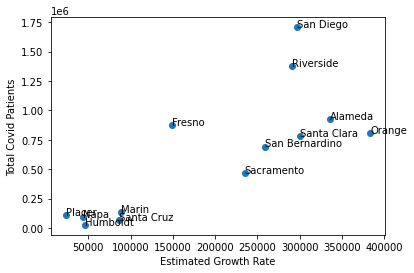

In [100]:
plt.scatter(df['Estimated_Growing_Rate'],df['Total_Covid_Patients'])
plt.xlabel('Estimated Growth Rate')
plt.ylabel('Total Covid Patients')
for i, txt in enumerate(list(df['County'])):
    plt.annotate(txt, (df['Estimated_Growing_Rate'][i], df['Total_Covid_Patients'][i]))